In [ ]:
%pip install numpy 
%pip install pandas 
%pip install matplotlib 
%pip install seaborn 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from ydata_profiling import ProfileReport

from scipy.stats import chi2_contingency, ttest_ind
import scipy.stats as stats

/Users/lruales/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/lruales/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
reservas = pd.read_csv('./data/hotel_bookings_modified.csv')

/var/folders/tl/_hb9hygj6kxbfmb0l04swmq40000gq/T/ipykernel_70324/1861392649.py:1: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  reservas = pd.read_csv('./data/hotel_bookings_modified.csv')


### ¿La temporada del año influye en la probabilidad de cancelar la reserva?
* H0: El promedio de cancelaciones es igual durante todo el año.
* H1: El promedio de cancelaciones es diferente según la temporada del año.

In [3]:
reservas['arrival_date_year'] = reservas['arrival_date_year'].map(lambda x: 2016 if x == 20016 else x)
reservas['mes_llegada'] = reservas['arrival_date_month'].map(lambda x : datetime.strptime(x,'%B') if x!= None else 0)
reservas['mes_llegada'] = reservas['mes_llegada'].map(lambda x : datetime.strftime(x,'%-m') if x!= None else 0)
reservas['fecha'] = pd.to_datetime({'year': reservas['arrival_date_year'], 'month': reservas['mes_llegada'], 'day': 1})

registros = reservas[~reservas['fecha'].isna()]


registros['year'] = registros['fecha'].dt.year
registros['month'] = registros['fecha'].dt.strftime('%m') # Format as "MM"
registros['month_day'] = registros['fecha'].dt.strftime('%m-%d') # Format as "MM"
registros['month_day_date'] = pd.to_datetime('2000-' + registros['month_day'])
registros['Q'] = registros['month'].apply(lambda x: (int(x)+4)//3)
registros['Q'].loc[registros['Q'] == 5] = 1

observadas = pd.crosstab(registros['is_canceled'], registros['Q'])
chi2, p_valor, dof, esperado = chi2_contingency(observadas)

# Imprime los resultados
print(f"Tabla de contingencia observada:\n{observadas}\n")
print(f"Estadística Chi-Cuadrado: {chi2}")
print(f"Valor p: {p_valor:.3f}")
print(f"Grados de libertad: {dof}")
print(f"Frecuencias esperadas:\n{esperado}")

# Interpreta el valor p
alfa = 0.05
if p_valor <= alfa:
    print("\nRechazamos la hipótesis nula. Existe una relación significativa entre el trimestre y la Tasa de Cancelación.")
else:
    print("\nNo podemos rechazar la hipótesis nula. No hay evidencia suficiente de una relación significativa entre el trimestre y la Tasa de Cancelación.")


/var/folders/tl/_hb9hygj6kxbfmb0l04swmq40000gq/T/ipykernel_70324/735375855.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  registros['year'] = registros['fecha'].dt.year
/var/folders/tl/_hb9hygj6kxbfmb0l04swmq40000gq/T/ipykernel_70324/735375855.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  registros['month'] = registros['fecha'].dt.strftime('%m') # Format as "MM"


Tabla de contingencia observada:
Q               1     2     3      4
is_canceled                         
0            6637  7964  8381  11332
1            2004  5425  7626   8938

Estadística Chi-Cuadrado: 1504.0794652276418
Valor p: 0.000
Grados de libertad: 3
Frecuencias esperadas:
[[ 5085.27747955  7879.50239251  9420.21023205 11929.0098959 ]
 [ 3555.72252045  5509.49760749  6586.78976795  8340.9901041 ]]

Rechazamos la hipótesis nula. Existe una relación significativa entre el trimestre y la Tasa de Cancelación.


/var/folders/tl/_hb9hygj6kxbfmb0l04swmq40000gq/T/ipykernel_70324/735375855.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  registros['month_day'] = registros['fecha'].dt.strftime('%m-%d') # Format as "MM"
/var/folders/tl/_hb9hygj6kxbfmb0l04swmq40000gq/T/ipykernel_70324/735375855.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  registros['month_day_date'] = pd.to_datetime('2000-' + registros['month_day'])
/var/folders/tl/_hb9hygj6kxbfmb0l04swmq40000gq/T/ipykernel_70324/735375855.py:13: SettingWithCo

### ¿El tipo de hotel influye en la probabilidad de cancelar la reserva?
* H0: El promedio de cancelaciones es igual sin importar el tipo de Hotel
* H1: El promedio de cancelaciones es diferente según el tipo de Hotel.

In [4]:
observadas = pd.crosstab(reservas['is_canceled'], reservas['hotel'])
chi2, p_valor, dof, esperado = chi2_contingency(observadas)

# Imprime los resultados
print(f"Tabla de contingencia observada:\n{observadas}\n")
print(f"Estadística Chi-Cuadrado: {chi2}")
print(f"Valor p: {p_valor:.3f}")
print(f"Grados de libertad: {dof}")
print(f"Frecuencias esperadas:\n{esperado}")

# Interpreta el valor p
alfa = 0.05
if p_valor <= alfa:
    print("\nRechazamos la hipótesis nula. Existe una relación significativa entre el tipo de Hotel y la Tasa de Cancelación.")
else:
    print("\nNo podemos rechazar la hipótesis nula. No hay evidencia suficiente de una relación significativa entre el Tipo de Hotel y la Tasa de Cancelación.")

Tabla de contingencia observada:
hotel        City Hotel  Resort Hotel
is_canceled                          
0                  5727         28939
1                 13105         11124

Estadística Chi-Cuadrado: 9251.726675479033
Valor p: 0.000
Grados de libertad: 1
Frecuencias esperadas:
[[11084.64406147 23581.35593853]
 [ 7747.35593853 16481.64406147]]

Rechazamos la hipótesis nula. Existe una relación significativa entre el tipo de Hotel y la Tasa de Cancelación.


## **Tipo de Deposito**

In [5]:
# Unificar valores de deposit_type
reservas['deposit_type'] = reservas['deposit_type'].replace({'non refund': 'Non Refund', 'No Refund': 'Non Refund'})

In [6]:
total = reservas.shape[0]
frecuencias = reservas['deposit_type'].value_counts()
schema ={'Categoria': frecuencias.index,
         'Valor': frecuencias.values}
    
df = pd.DataFrame(schema)
    
df['Proporcion'] = df['Valor']/total
print(df)

    Categoria  Valor  Proporcion
0  No Deposit  52333    0.888581
1  Non Refund   6419    0.108991
2  Refundable    143    0.002428


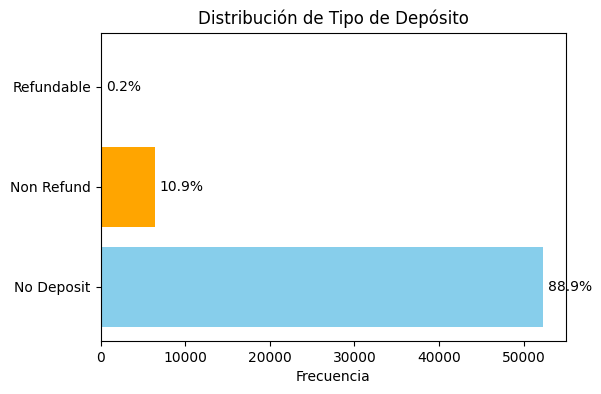

In [10]:
fig, ax = plt.subplots(figsize=(6,4))
bars = ax.barh(df['Categoria'], df['Valor'], color=['skyblue','orange','green'])

# Etiquetas al final de cada barra
for bar, prop in zip(bars, df['Proporcion']):
    xval = bar.get_width()
    ax.text(xval + 500, bar.get_y() + bar.get_height()/2, f"{prop:.1%}", va='center')

ax.set_title("Distribución de Tipo de Depósito")
ax.set_xlabel("Frecuencia")
plt.show()


**¿El tipo de depósito influye significativamente en la probabilidad de que una reserva sea cancelada?**

**Hipotesis**
- H0 (nula) = La tasa de cancelación es igual independientemente del depósito. 
- H1 (alternativa) =  La tasa de cancelación depende del tipo de depósito.

Con un nivel de significancia: α= 0.05

In [11]:
selected_deposits = ["No Deposit", "Refundable", "Non Refund"]  

cont = pd.crosstab(
    reservas.loc[reservas["deposit_type"].isin(selected_deposits), "deposit_type"],
    reservas.loc[reservas["deposit_type"].isin(selected_deposits), "is_canceled"]
).reindex(index=selected_deposits)

cont

is_canceled,0,1
deposit_type,,
No Deposit,34476,17857
Refundable,121,22
Non Refund,69,6350


In [14]:
alpha = 0.05
# Chi-cuadrado de independencia
chi2, pval, dof, expected = chi2_contingency(cont)

# Tamaño del efecto: Cramér's V
n = cont.values.sum()
phi2 = chi2 / n
r, k = cont.shape  # r=filas, k=columnas
cramers_v = np.sqrt(phi2 / (min(r-1, k-1)))

print(f"Chi²: {chi2:.4f}")
print(f"DoF: {dof}")
print(f"p-value: {pval:.4g}")
print(f"Cramér's V: {cramers_v:.3f}  (0≈nulo, 0.1≈pequeño, 0.3≈mediano, 0.5≈grande)")
if pval < alpha:
    print("Rechazamos la hipótesis nula (H0). La tasa de cancelación depende del tipo de depósito.")


Chi²: 9955.1357
DoF: 2
p-value: 0
Cramér's V: 0.411  (0≈nulo, 0.1≈pequeño, 0.3≈mediano, 0.5≈grande)
Rechazamos la hipótesis nula (H0). La tasa de cancelación depende del tipo de depósito.


In [15]:

reference = [0.1, 0.3, 0.5]  # umbrales ~pequeño, mediano, grande
magnitud = min(reference, key=lambda r: abs(r - cramers_v))

match magnitud:
    case 0.1:
        print("el tamaño del efecto es pequeño (Cramér's V).")
    case 0.3:
        print("el tamaño del efecto es moderado (Cramér's V).")
    case 0.5:
        print("el tamaño del efecto es grande (Cramér's V).")


el tamaño del efecto es grande (Cramér's V).


In [16]:
residuals_std = (cont - expected) / np.sqrt(expected)
residuals_std

is_canceled,0,1
deposit_type,,
No Deposit,20.924448,-25.028691
Refundable,4.014319,-4.801711
Non Refund,-60.345070,72.181502


C:\Users\d.camachom\AppData\Local\Temp\ipykernel_22452\3558092204.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cancel_rate, x="deposit_type", y="is_canceled", palette="Set2")


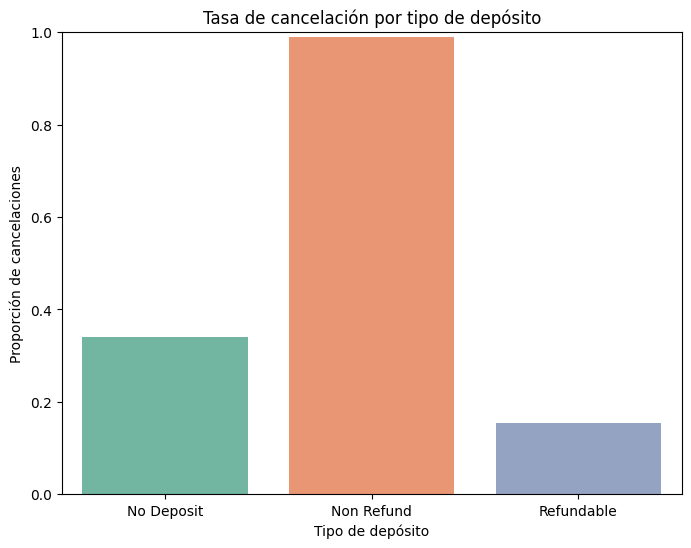

In [20]:
cancel_rate = reservas.groupby("deposit_type")["is_canceled"].mean().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(data=cancel_rate, x="deposit_type", y="is_canceled", palette="Set2")
plt.title("Tasa de cancelación por tipo de depósito")
plt.xlabel("Tipo de depósito")
plt.ylabel("Proporción de cancelaciones")
plt.ylim(0,1)
plt.show()


## **Número de cancelaciones previas**

**¿El número de cancelaciones previas de un cliente influye en la probabilidad de cancelar la reserva actual?**

- H0: El promedio de cancelaciones previas es igual entre clientes que cancelan su reserva actual y los que no la cancelan.
- H1: El promedio de cancelaciones previas es diferente entre clientes que cancelan su reserva actual y los que no la cancelan.

In [27]:
#Nivel de significancia
alpha = 0.05

#Preparar los datos
grupo_cancelados = reservas.loc[reservas["is_canceled"] == 1, "previous_cancellations"]
grupo_no_cancelados = reservas.loc[reservas["is_canceled"] == 0, "previous_cancellations"]

n1, n2 = len(grupo_cancelados), len(grupo_no_cancelados)
m1, m2 = grupo_cancelados.mean(), grupo_no_cancelados.mean()
s1, s2 = grupo_cancelados.std(), grupo_no_cancelados.std()

print("Muestras:", n1, n2)
print("Media cancelados:", m1)
print("Media no cancelados:", m2)
print("Desv. estándar cancelados:", s1)
print("Desv. estándar no cancelados:", s2)


Muestras: 24229 34666
Media cancelados: 0.15956085682446655
Media no cancelados: 0.006028962095424912
Desv. estándar cancelados: 1.710362537173086
Desv. estándar no cancelados: 0.09723420937768365


In [24]:
resultado = ttest_ind(grupo_cancelados, grupo_no_cancelados, equal_var=False)

print("t-statistic:", resultado.statistic)
print("p-value:", resultado.pvalue)

t-statistic: 13.956876071161606
p-value: 4.2266205610474167e-44


In [25]:
#Intervalo de confianza para la diferencia de medias
diff = m1 - m2
se = np.sqrt((s1**2/n1) + (s2**2/n2))

# Grados de libertad de Welch
df = ( (s1**2/n1 + s2**2/n2)**2 ) / ( ((s1**2/n1)**2)/(n1-1) + ((s2**2/n2)**2)/(n2-1) )

t_crit = stats.t.ppf(1 - alpha/2, df)
ci_low, ci_high = diff - t_crit*se, diff + t_crit*se

print(f"Diferencia de medias: {diff:.3f}")
print(f"IC95%: [{ci_low:.3f}, {ci_high:.3f}]")


Diferencia de medias: 0.154
IC95%: [0.132, 0.175]


In [26]:
#  Decisión
if resultado.pvalue <= alpha:
    print(" Se rechaza H0: El número de cancelaciones previas influye en la probabilidad de cancelar la reserva actual.")
else:
    print("No se rechaza H0: No hay evidencia de que las cancelaciones previas influyan en la probabilidad de cancelar la reserva actual.")


 Se rechaza H0: El número de cancelaciones previas influye en la probabilidad de cancelar la reserva actual.


C:\Users\d.camachom\AppData\Local\Temp\ipykernel_22452\3540543500.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=reservas, x="is_canceled", y="previous_cancellations", palette="Set2")


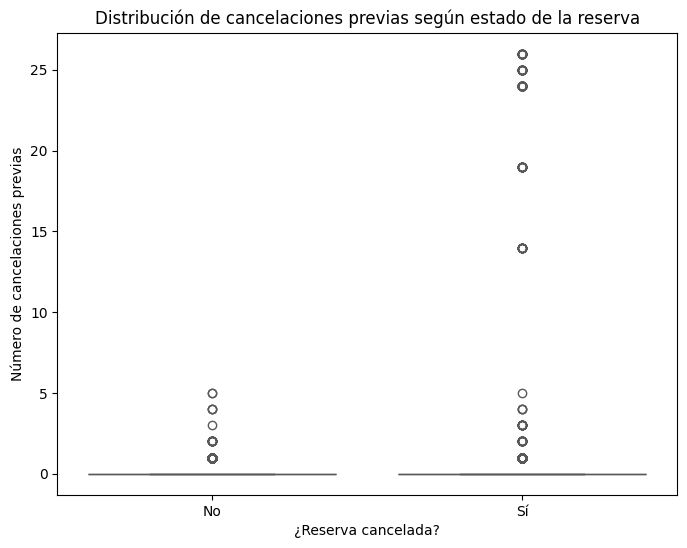

In [28]:
plt.figure(figsize=(8,6))
sns.boxplot(data=reservas, x="is_canceled", y="previous_cancellations", palette="Set2")
plt.title("Distribución de cancelaciones previas según estado de la reserva")
plt.xlabel("¿Reserva cancelada?")
plt.ylabel("Número de cancelaciones previas")
plt.xticks([0,1], ["No", "Sí"])
plt.show()

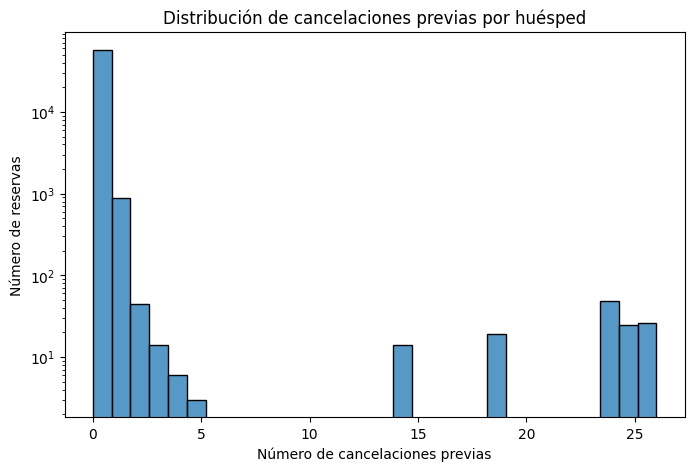

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(reservas["previous_cancellations"], bins=30, kde=False)
plt.title("Distribución de cancelaciones previas por huésped")
plt.xlabel("Número de cancelaciones previas")
plt.ylabel("Número de reservas")
plt.yscale("log")  
plt.show()

## **Número de de dias de la reserva a la llegada**

**¿Reservar con más días de antelación aumenta la probabilidad de que la reserva sea cancelada?**

-	H0: El tiempo de antelación de la reserva (lead_time) no está relacionado con la probabilidad de cancelación.
-	H1: A mayor tiempo de antelación, mayor es la probabilidad de que la reserva sea cancelada.


In [31]:
alpha = 0.05

# Preparar los datos
grupo_cancelados = reservas.loc[reservas["is_canceled"] == 1, "lead_time"]
grupo_no_cancelados = reservas.loc[reservas["is_canceled"] == 0, "lead_time"]

n1, n2 = len(grupo_cancelados), len(grupo_no_cancelados)
m1, m2 = grupo_cancelados.mean(), grupo_no_cancelados.mean()
s1, s2 = grupo_cancelados.std(), grupo_no_cancelados.std()

print("Muestras:", n1, n2)
print("Media cancelados:", m1)
print("Media no cancelados:", m2)
print("Desv. estándar cancelados:", s1)
print("Desv. estándar no cancelados:", s2)

Muestras: 24229 34666
Media cancelados: 129.66003549465518
Media no cancelados: 79.35628569780188
Desv. estándar cancelados: 106.93736328424515
Desv. estándar no cancelados: 91.39556089249513


In [32]:
t_stat, p_val = ttest_ind(grupo_cancelados, grupo_no_cancelados, equal_var=False)

# Como la hipótesis es direccional (cancelados > no cancelados), ajustamos el p-valor para una cola
p_val_one_sided = p_val / 2 if t_stat > 0 else 1 - (p_val / 2)

print("t-statistic:", t_stat)
print("p-valor (una cola):", p_val_one_sided)


t-statistic: 59.57631810430132
p-valor (una cola): 0.0


In [33]:
# Intervalo de confianza para la diferencia de medias
diff = m1 - m2
se = np.sqrt((s1**2/n1) + (s2**2/n2))

# Grados de libertad de Welch
df = ( (s1**2/n1 + s2**2/n2)**2 ) / ( ((s1**2/n1)**2)/(n1-1) + ((s2**2/n2)**2)/(n2-1) )

t_crit = stats.t.ppf(1 - alpha/2, df)
ci_low, ci_high = diff - t_crit*se, diff + t_crit*se

print(f"Diferencia de medias: {diff:.3f}")
print(f"IC95%: [{ci_low:.3f}, {ci_high:.3f}]")

Diferencia de medias: 50.304
IC95%: [48.649, 51.959]


In [34]:
if p_val_one_sided <= alpha:
    print("Se rechaza H0: Reservar con más días de antelación aumenta la probabilidad de cancelación.")
else:
    print("No se rechaza H0: No hay evidencia de que más antelación incremente las cancelaciones.")


Se rechaza H0: Reservar con más días de antelación aumenta la probabilidad de cancelación.


In [36]:
max_lt = reservas["lead_time"].max()

bins = [0, 7, 30, 90, max_lt]
labels = ["Último minuto (0–7)", "Corto plazo (8–30)", "Mediano plazo (31–90)", f"Largo plazo (91–{int(max_lt)})"]

reservas["lead_time_group"] = pd.cut(
    reservas["lead_time"], bins=bins, labels=labels, include_lowest=True, right=True
)

In [37]:
cancel_rate = (
    reservas
    .groupby("lead_time_group", observed=True)["is_canceled"]
    .agg(tasa_cancelacion="mean", reservas="size")
    .reset_index()
)

# Orden opcional de los rangos
order_groups = labels
cancel_rate = cancel_rate.set_index("lead_time_group").loc[order_groups].reset_index()

cancel_rate

,lead_time_group,tasa_cancelacion,reservas
0,Último minuto (0–7),0.122029,10604
1,Corto plazo (8–30),0.343852,8873
2,Mediano plazo (31–90),0.454987,14607
3,Largo plazo (91–737),0.533554,24811


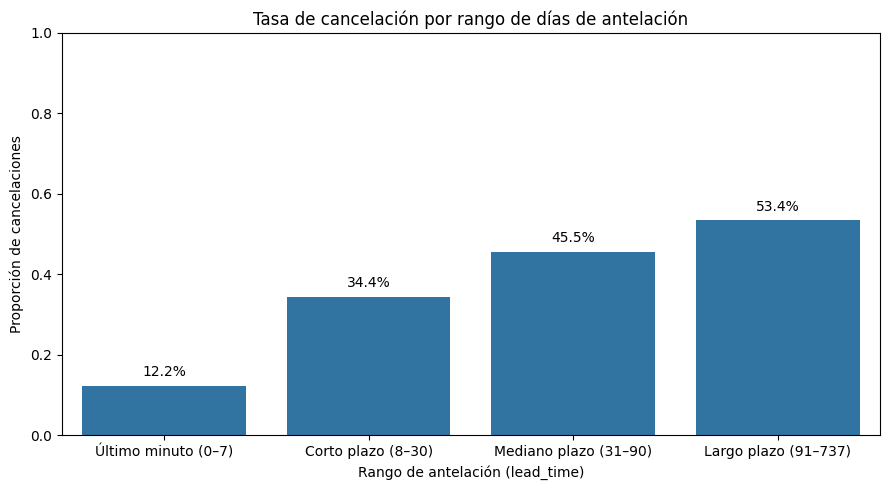

In [38]:
plt.figure(figsize=(9,5))
ax = sns.barplot(data=cancel_rate, x="lead_time_group", y="tasa_cancelacion")
ax.set_title("Tasa de cancelación por rango de días de antelación")
ax.set_xlabel("Rango de antelación (lead_time)")
ax.set_ylabel("Proporción de cancelaciones")
ax.set_ylim(0, 1)

# Anotar porcentajes
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.1%}", 
                (p.get_x() + p.get_width()/2, height),
                ha="center", va="bottom", fontsize=10, xytext=(0, 5), textcoords="offset points")

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

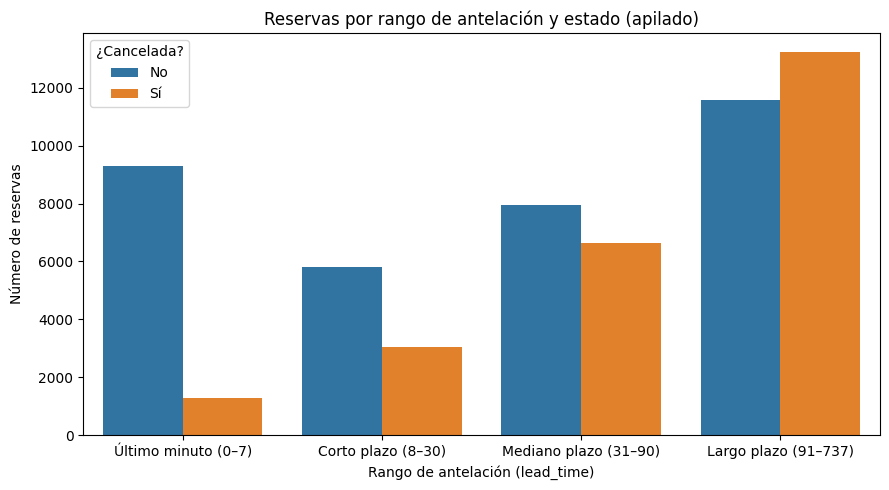

In [39]:
plt.figure(figsize=(9,5))
sns.countplot(data=reservas, x="lead_time_group", hue="is_canceled")
plt.title("Reservas por rango de antelación y estado (apilado)")
plt.xlabel("Rango de antelación (lead_time)")
plt.ylabel("Número de reservas")
plt.legend(title="¿Cancelada?", labels=["No", "Sí"])
plt.tight_layout()
plt.show()